# Helper Functions Volume 3A: Exploratory Data Analysis (EDA) with Seaborn

Author: Koh Kok Bin  
Date: 13 Dec 2021

This notebook provides some helper functions or codes that users can use in their script to analyse cleaned data for some preliminary insights via visualisation. This will be comprehensive in nature to cater to Python users of all levels.  

EDA can encompass parts of data processing, and these 2 phases are interlineked. Generally speaking, EDA requires knowledge of data processing to transform data to fit the required visualisation. At a high level, EDA helps the user in understanding the underlying characteristics of the data. This can then inform your choice of models to use, or if the data is even appropriate for the current business problem statement.

I encourage you to learn about matplotlib first via HELPER_VOL3 before moving onto seaborn.

## <a id = "VOL3A_toc"> Table of contents:  </a>

- [Reference Materials -- This needs to be run so that Parts 1 to n can work.](#VOL3A_refmat)  
- [General guide to plotting](#VOL3A_guide)
- [Part 2: Seaborn](#VOL3A_seaborn)  

### <a id = "VOL3A_refmat"> Reference Materials </a>
[Return to top](#VOL3A_toc)  

Run this section before proceeding onto [Part 2](#VOL3A_seaborn). The codes in this section are the same as VOL3.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt  # np, pd, plt by convention
import seaborn as sns

# ensures that plots are generated inside Jupyter Notebook:
%matplotlib inline 


In [2]:
# Get directory name of this file. Helpful to specify the directory of the file, 
# so you can also interact with the files in the same location via relative paths.

dirname = globals()["_dh"][0]

In [3]:
data_folder = "VOL3"
list_of_files = os.listdir(os.path.join(dirname, data_folder))
list_of_files2 = os.listdir(data_folder) # Same as above

print(list_of_files, "\n", list_of_files2)

['resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'] 
 ['resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv']


In [4]:
# Replace function is meant to ensure sharepoint files will work.
# This code is more readable too.
datafile = os.path.join(dirname, data_folder, list_of_files[0]).replace("\\", "/")
df = pd.read_csv(datafile)

In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


### <a id = "VOL3A_guide"> General guide on plotting with Seaborn </a> 

[Return to top](#VOL3A_toc)

The reason why matplotlib is introduced before seaborn is because any higher-level package (seaborn) represents a trade-off between the full functionality that the lower-level package (matplotlib) offers.

Whilst matplotlib is usually the analysts' first visualisation package, over time both packages are used. For example, seaborn provides aesthetically pleasing visuals that can enable more compelling storytelling.

This Notebook will dive into the housing dataset again, this time using seaborn package to create better looking plots to illustrate the usefulness of visualisation. That, in my opinion, is the beauty of code. Everything (and anything) can be created. Just need to find the right code for it.

### <a id = "VOL3A_seaborn"> Part 2: Seaborn </a>  

[Return to top](#VOL3A_toc)  

Run [Reference Materials](#VOL3A_refmat) first!  

#### <a id = "VOL3A_Part2Sect2"> Section 2: Practical Examples </a>  

Seaborn is a visualisation library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics. In the examples below, we will take it one step further, combining both seaborn and matplotlib plots. You should have a strong grasp on the HDB dataset (as illustrated in VOL3) before proceeding.

Please refer to the internet link below for the full documentation:  
- https://seaborn.pydata.org/index.html

[Return to top](#VOL3A_toc)  [Return to section top](#VOL3A_seaborn)  

In [6]:
df1 = df.copy()
df1.columns = map(str.upper, df1.columns)

In [7]:
# distribution plots by lease year.
df1.head(2)

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [8]:
df1_lease = df1.copy()

# Let's visualise lease years. First we need to derive the 'age' of the flat.
# This can be extracted from the remaining lease column.
# We also don't want to visualise all years from say 60 to 94 years. 
# That will be 35 categories, which is quite excessive.
df1_lease["REMAIN_YEARS"] = df1_lease["REMAINING_LEASE"].str.split(" ").str[0]
df1_lease["REMAIN_GROUP"] = df1_lease["REMAIN_YEARS"].astype(int)

mapping = {}
for i in range(30, 99):
    
    if i % 5 != 0:
        nearest_multiple = 5 * round(i/5)
        mapping[i] = nearest_multiple
        
# This will make 61 and 62 = 60, 63 to 67 to 65, 68 to 72 = 70

df1_lease["REMAIN_GROUP"] = df1_lease["REMAIN_GROUP"].replace(mapping)
df1_lease["REMAIN_GROUP"].unique()

data = df1_lease.loc[df1_lease["REMAIN_GROUP"] > 49, "REMAIN_YEARS"]

A mixture of matplotlib codes and distplot is used for best of both worlds. Please play around with the parameters. Ax objects allow for fuller flexibility too, like setting of titles and ticks.  

Generally speaking though, histograms works better with continuous x variables, like resale prices. Given the lease years (discrete/categorical), can be abit hard to partition the bins especially if there are x bins for y years and y/x is not an integer.

In [9]:
cmap = sns.color_palette(palette = "coolwarm")

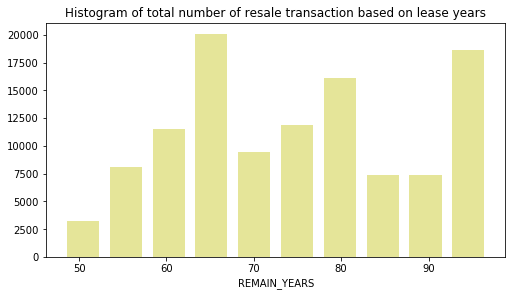

In [10]:
# Note that on the internet (i.e. latest seaborn version), 
# distplot is deprecated in place of displot and histplot.
fig, ax = plt.subplots(figsize = (7, 4), constrained_layout = True)

ax.set_title("Histogram of total number of resale transaction based on lease years")
sns.distplot(data.astype(int), kde=False, bins=10, color = "y", hist_kws = {"rwidth":0.75, "linewidth": 3})

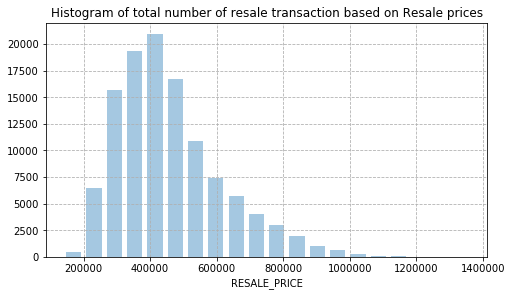

In [11]:
fig, ax = plt.subplots(figsize = (7, 4), constrained_layout = True)
ax.set_title("Histogram of total number of resale transaction based on Resale prices")
sns.distplot(df1_lease["RESALE_PRICE"], kde=False, bins=20, 
             hist_kws = {"rwidth":0.75, "linewidth": 3})

ax.grid(visible = True, which = "both", axis = "both", linestyle = "--")

In [12]:
# Let's try to plot a cdf to see how many % of resale transactions are under x prices.
df1_lease = df1_lease.sort_values(by = "RESALE_PRICE")
df1_lease["REASLE_CUMSUM"] = df1_lease["RESALE_PRICE"].cumsum()
df1_lease["RESALE_CDF_TOT"] = df1_lease["RESALE_PRICE"].cumsum() / df1_lease["REASLE_CUMSUM"].iloc[-1]

In [13]:
df1_lease["REASLE_CUMSUM"].iloc[-1]

52542172314.899994

In [14]:
df1_lease["RESALE_CDF_TOT"].tail()

99935     0.999901
100459    0.999925
90537     0.999949
90539     0.999974
90545     1.000000
Name: RESALE_CDF_TOT, dtype: float64

In [ ]:
ax2.set_ylabel?

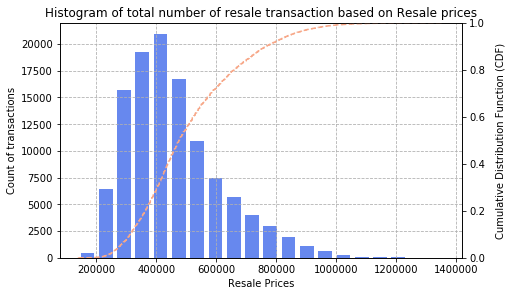

In [17]:
fig, ax = plt.subplots(figsize = (7, 4), constrained_layout = True)

ax2 = ax.twinx()
ax2.set_ylim(0, 1)

ax.set_title("Histogram of total number of resale transaction based on Resale prices")
ax.set_xlabel("Resale Prices")
ax.set_ylabel("Count of transactions")
ax2.set_ylabel("Cumulative Distribution Function (CDF)", labelpad = 10)

ax.hist(df1_lease["RESALE_PRICE"], bins = 20, rwidth = 0.75, color = cmap[0])
ax2.plot(df1_lease["RESALE_PRICE"], df1_lease["RESALE_CDF_TOT"], color = cmap[4], linestyle = "--")
ax.grid(visible = True, which = "both", axis = "both", linestyle = "--")

Power of seaborn. Pairplots! pairplots help visualise large swaths of data at once, usually discrete/continuous variables. Check the below cell. Pairplot will plot numerical datatypes. However, to be more calibrated, you can also plot only desired variables.  

This is a useful "at a glance" plot to kickstart your EDA process, as it may uncover hidden insights and patterns that can be hard to .

In [ ]:
sns.pairplot?

In [20]:
df1.head(2)

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


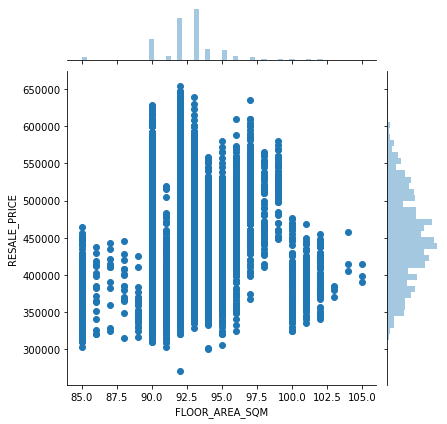

In [21]:
pgl_sk_4rm = df1.loc[(df1["TOWN"].isin(["PUNGGOL", "SENGKANG"])) & (df1["FLAT_TYPE"] == "4 ROOM"), :] 
#pgl_sk_4rm.head()
sns.jointplot(x = "FLOOR_AREA_SQM", y = "RESALE_PRICE", data = pgl_sk_4rm, kind = "scatter")

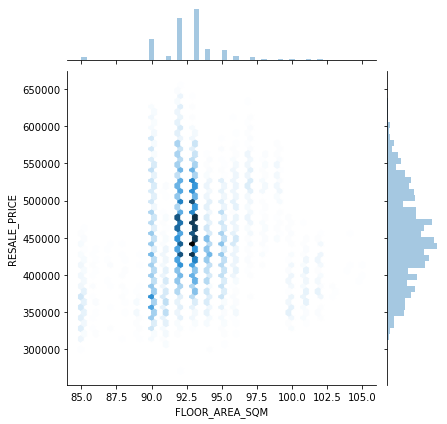

In [22]:
# Gives you better understanding as to how much are really in each "scatter" group.
sns.jointplot(x = "FLOOR_AREA_SQM", y = "RESALE_PRICE", data = pgl_sk_4rm, kind = "hex")

It can be quite tempting to plot the whole dataset or even a smaller subset, but we have to do EDA in a smart way. The plot above tells us nothing much, but that floor area is not really correlated with resale price. Even 100 sqm flats for 4 rooms sell for less than a 92 sqm flat.  

What are we missing? Proximity to amenities! The nearest it is to MRTs or shopping malls, the more valuable the flat will be. How can we integrate distance or proximity data into this dataset?  

Even then, from 2017 to 2021, we've seen the resale housing index go on a perpetual uptrend. Hence why you see in the plot above the distribution of prices for the same sized flat is such a wide range. It is affected by the "when" and the "where". Something to think about.  

At the end of the day, what is important is YOUR business question. Does the plot above give more insights to the question? If not, what will?

In [ ]:
sns.pairplot?
# Note that pairplot works mainly on numerical datatypes.

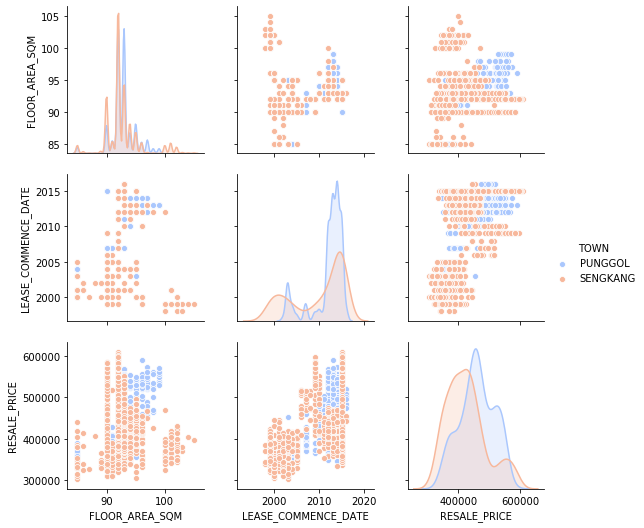

In [23]:
pgl_sk_4rm_2019 = pgl_sk_4rm.loc[pgl_sk_4rm["MONTH"].str.contains("2019"), :]
sns.pairplot(pgl_sk_4rm_2019, hue='TOWN',palette='coolwarm')

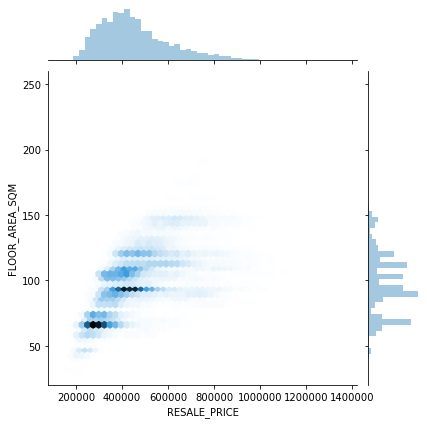

In [27]:
# A third dimension could have been used inside the 'hue' argument.
# This would have allowed the plot  to visualize FLAT_TYPE by colors
# Which would have provided even more insights in one chart.
# However, the version of the seaborn package on Python now is not updated.
sns.jointplot(x = "RESALE_PRICE", y = "FLOOR_AREA_SQM", data = df1, kind = "hex")

Because the type of EDA you do depends wholly on your business problem statement, I will just dump some other plots here, just to show you how seaborn's plot mechanism works, as well as to let you familiarise yourself with such plots.

In [ ]:
sns.lmplot?

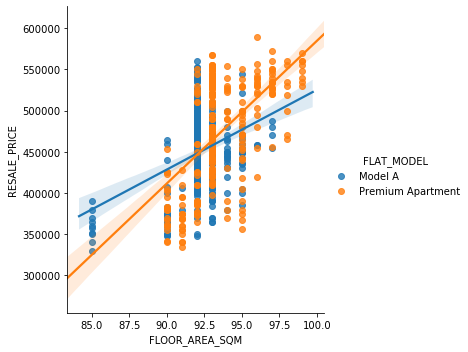

In [28]:
# lm plots - plots meant to illustrate linear regression.
pgl_allrm_2019 = df1.loc[(df1["TOWN"] == "PUNGGOL") & (df1["MONTH"].str.contains("2019")), :]

#mylm_plot = sns.lmplot(x = "FLOOR_AREA_SQM", y = "RESALE_PRICE", col = "FLAT_TYPE", hue = "FLAT_TYPE", data = pgl_allrm_2019, col_wrap = 2)

# To plot each FLAT_TYPE one by one, see below,
sns.lmplot(x = "FLOOR_AREA_SQM", y = "RESALE_PRICE", data = pgl_allrm_2019.loc[pgl_allrm_2019["FLAT_TYPE"] == "4 ROOM"], hue = "FLAT_MODEL")

#mylm_plot = mylm_plot.set(ylim = (0, 950000), xlim = (0, 160))

It seems like a useless plot, but it informs the user when he/she gets to model selection and evaluation stage. From a simple plot like this (even if the plots look ugly and condensed; we can simply plot them one by one and see the effect), we can see that the regression profile is slightly different for each flat type. Should we be regressing *all* subsets of resale transactions over price? Or each flat type deserves a different ML model?

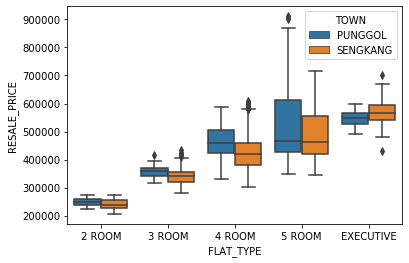

In [29]:
pgl_sk_2019 = df1.loc[(df1["TOWN"].isin(["PUNGGOL", "SENGKANG"])) & (df1["MONTH"].str.contains("2019")), :] 

sns.boxplot(x = "FLAT_TYPE", y = "RESALE_PRICE", hue = "TOWN", data = pgl_sk_2019)

Informs user about the relative attraction of Punggol vs Sengkang, excluding other variables such as proximity.  

The last plot below is not necessary, but there are times you need to visualize multipler dimensions into a plot. This is how you can do so.

In [32]:
towns = [a for a in list(df1["TOWN"].unique())]
grouped_df = df1.loc[df1["TOWN"].isin(towns), :].groupby(by = ["TOWN", "FLAT_TYPE"]).quantile().reset_index()
grouped_df.head(2)

0.5,TOWN,FLAT_TYPE,FLOOR_AREA_SQM,LEASE_COMMENCE_DATE,RESALE_PRICE
0,ANG MO KIO,2 ROOM,44.0,1979.0,210000.0
1,ANG MO KIO,3 ROOM,68.0,1980.0,298000.0


In [33]:
grouped_df_count = df1.loc[(df1["TOWN"].isin(towns)) 
#                            & (df1["FLAT_TYPE"] == "4 ROOM")
                           , :].groupby(by = ["TOWN", "FLAT_TYPE"]).count().reset_index()
grouped_df_count.head(2)

,TOWN,FLAT_TYPE,MONTH,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,ANG MO KIO,2 ROOM,79,79,79,79,79,79,79,79,79
1,ANG MO KIO,3 ROOM,2634,2634,2634,2634,2634,2634,2634,2634,2634


In [35]:
# The count field is required but groupby only allows for one aggregation operation at a time, we need to do groupby twice to generate 
# both median resale prices and count of such transactions by town and flat type.
# Once joined, rename columns.
grouped_df_new = grouped_df.merge(grouped_df_count[["TOWN", "FLAT_TYPE", "RESALE_PRICE"]], how = "left", on = ["TOWN", "FLAT_TYPE"])
grouped_df_new = grouped_df_new.rename(columns = {"RESALE_PRICE_x": "MEDIAN_RESALE_PRICE", "RESALE_PRICE_y":"COUNT_OF_TXNS"})
grouped_df_new.head(2)

,TOWN,FLAT_TYPE,FLOOR_AREA_SQM,LEASE_COMMENCE_DATE,MEDIAN_RESALE_PRICE,COUNT_OF_TXNS
0,ANG MO KIO,2 ROOM,44.0,1979.0,210000.0,79
1,ANG MO KIO,3 ROOM,68.0,1980.0,298000.0,2634


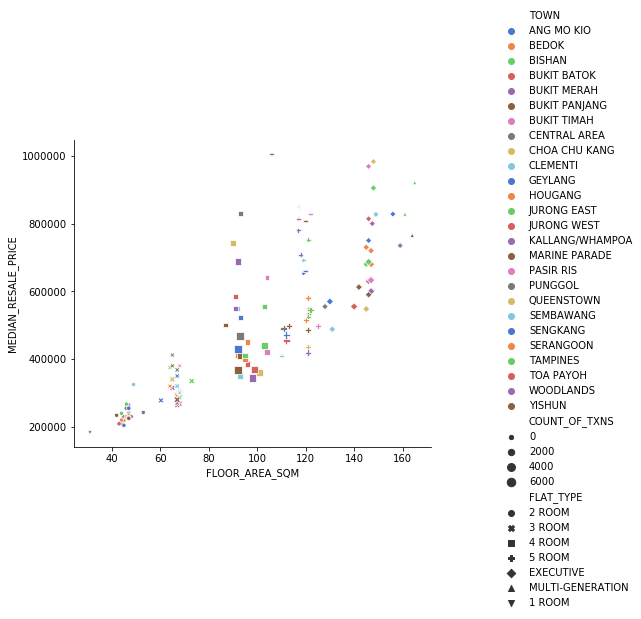

In [38]:
# To visualize the plot. col and col_wrap argument will enable plotting by the subset as defined in col. col_wrap is number of plots in each row.

#relplots = sns.relplot(x = "FLOOR_AREA_SQM", y = "MEDIAN_RESALE_PRICE", hue = "TOWN", size = "COUNT_OF_TXNS", 
                       #col = "FLAT_TYPE", data = grouped_df_new, col_wrap = 2, palette = "muted")
    
relplots_2 = sns.relplot(x = "FLOOR_AREA_SQM", y = "MEDIAN_RESALE_PRICE", hue = "TOWN", size = "COUNT_OF_TXNS", 
                       style = "FLAT_TYPE", data = grouped_df_new, palette = "muted")
relplots_2.fig.set_figwidth(10)

This plot is nowhere as insightful, but it gives you an (open-ended) idea as to how many dimensions can be plotted. In this plot, I've plotted 2 x/y dimensions, as well as town (by color), transaction count (by size) and by flat type (by market style).  

The type of plot to use also depends on how easy it is interpreted by the target audience. For less technically-savvy audience, suggest to use simpler plots with contrasting colors to deliver compelling storytelling.

### Closing Thoughts

I won't be able to visualise all plots, but the important point is whether you've understood the data or not. If you don't understand the data, you won't really know what/how you want to visualise. Furthermore, in this EDA example, you would have probably taken note of some considerations (i.e. the influece of distance) that will impact model selection and evaluation.  

It's not a hard science; I'm no expert and we are all still learning. Best to form a mental model around plots so that the learnings here can be similarly applied to other datasets.

The plot operates on a simple mental model, which is "what kind of data you want to plot"? Then from there, questions like "categorical / numerical?" What's the y variable? Any groupings needed? Can we use EDA to identify outliers? Should we remove them? Are there any more features we could use in the dataset (requires liaising w other data owners)?  

Data processing and EDA takes up to 80% of the project's time. Hence, much of my effort writing the reference materials are devoted to these 2 topics. Model selection will become clearer once EDA is completed and the user understands the nature of the data.